In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera
import seaborn as sns

In [54]:
df = pd.read_excel('updated_case_file.xlsx')

In [55]:
df.columns

Index(['District', 'SowingSeedsDistributed_Maize_320',
       'LivestockCensus_2012_Cattle_354', 'LivestockCensus_2012_Buffaloes_355',
       'RuralRationCardHolders_47',
       'TotalBPLPriorityCardHoldersAkshayaWithoutCylinder_39',
       'RuralRationShops_29', 'PWDRoadLength_MajorDistrictRoads_521',
       'MotorVehicles_Trailers_515',
       'NetAreaIrrigatedUnderDifferentSources_OtherSources_GrossIrrigatedArea_186',
       'NetAreaIrrigatedUnderDifferentSources_OtherSources_NetIrrigatedArea_187',
       'NetAreaIrrigatedUnderDifferentSources_TotalGrossIrrigatedArea_188',
       'NetAreaIrrigatedUnderDifferentSources_TotalNetIrrigatedArea_189',
       'NetAreaIrrigatedUnderDifferentSources_TubeWells_GrossIrrigatedArea_181',
       'NetAreaIrrigated_Wells_GrossIrrigatedArea_178',
       'NetAreaIrrigated_Wells_NetAreaIrrigated_179',
       'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182',
       'NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_183',
   

In [56]:
df_new_data = pd.read_excel('Agriculture_KAG_2016_17.xlsx')

In [57]:
df_new_data['LivestockCensus_2012_Buffaloes_355']

0       8453
1      24381
2      30619
3     152852
4     175896
5      45876
6      47140
7     149515
8     181118
9      70870
10      3700
11      8846
12    141264
13     14476
14    145516
15     45419
16     20887
17    829370
18    156860
19    234802
20     79513
21     60989
22     98468
23     87816
24    142255
25    130781
26     91254
27     76855
28    136854
29     77860
Name: LivestockCensus_2012_Buffaloes_355, dtype: int64

In [58]:
df_new_data['Total_Production'] = df_new_data['TotalCerealsandMinorMillets_Production_230'] + df_new_data['TotalOilSeeds_Production_249'] + df_new_data['TotalFoodGrains_240'] + df_new_data['TotalGourdVarietyVegetables_276']
df_new_data['Ratio'] = df_new_data['Maize_Production_226']/df_new_data['Total_Production']

In [59]:
df_new_data['Ratio'] * df_new_data['LivestockCensus_2012_Buffaloes_355']

0        158.899070
1       3843.536661
2        910.641752
3      46440.047075
4      45371.783044
5        456.450501
6      13626.325518
7      27542.956755
8      13038.870529
9       8517.694450
10         0.000000
11         3.316333
12     35174.642885
13      1244.080603
14      3481.422735
15      5086.754725
16      6396.657808
17    222505.970274
18     30141.116018
19     63510.827140
20     13714.935136
21     14647.954898
22     32919.876905
23      5880.488851
24     19387.703034
25      1322.666900
26      1200.015051
27       309.994590
28        71.847351
29     11641.685806
dtype: float64

In [60]:
params = ['RuralRationCardHolders_47','TotalBPLPriorityCardHoldersAkshayaWithoutCylinder_39','RuralRationShops_29','PWDRoadLength_MajorDistrictRoads_521','SowingSeedsDistributed_Maize_320']

In [61]:
df_new_data['Ratio']

0     0.018798
1     0.157645
2     0.029741
3     0.303824
4     0.257947
5     0.009950
6     0.289061
7     0.184215
8     0.071991
9     0.120188
10    0.000000
11    0.000375
12    0.248999
13    0.085941
14    0.023925
15    0.111996
16    0.306251
17    0.268283
18    0.192153
19    0.270487
20    0.172487
21    0.240174
22    0.334321
23    0.066964
24    0.136288
25    0.010114
26    0.013150
27    0.004033
28    0.000525
29    0.149521
Name: Ratio, dtype: float64

In [62]:
df = df.drop('District', axis=1)
#df = df.drop('Unnamed: 0', axis=1)
#params = ['AreaUnderCereals_Paddy_190','UrbanBPLPriorityCardHoldersAkshayaWithoutCylinder_37','LivestockCensus_2012_Cattle_354','NetAreaIrrigated_Canals_Length_171','Rice_Production_223']
for column_name in df.columns:
    print(column_name)
    if( column_name not in params ):
        df[column_name] = df[column_name] * df_new_data['Ratio'] 
df['District'] = df_new_data['District']

SowingSeedsDistributed_Maize_320
LivestockCensus_2012_Cattle_354
LivestockCensus_2012_Buffaloes_355
RuralRationCardHolders_47
TotalBPLPriorityCardHoldersAkshayaWithoutCylinder_39
RuralRationShops_29
PWDRoadLength_MajorDistrictRoads_521
MotorVehicles_Trailers_515
NetAreaIrrigatedUnderDifferentSources_OtherSources_GrossIrrigatedArea_186
NetAreaIrrigatedUnderDifferentSources_OtherSources_NetIrrigatedArea_187
NetAreaIrrigatedUnderDifferentSources_TotalGrossIrrigatedArea_188
NetAreaIrrigatedUnderDifferentSources_TotalNetIrrigatedArea_189
NetAreaIrrigatedUnderDifferentSources_TubeWells_GrossIrrigatedArea_181
NetAreaIrrigated_Wells_GrossIrrigatedArea_178
NetAreaIrrigated_Wells_NetAreaIrrigated_179
NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182
NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_183
AreaUnderCereals_Maize_193
MotorVehicles_Tractors_514
TotalAgricultureLoan
TotalNPK_315
Maize_Production_226


In [11]:
#df = df.drop('District', axis=1)

In [63]:
df.to_csv('Undone_PCR_dataset.csv')

In [73]:
df = pd.read_csv('Undone_PCR_dataset.csv')
df = df.drop('District', axis=1).drop('Unnamed: 0', axis=1)

In [74]:
df_new_data['Ratio']

0     0.018798
1     0.157645
2     0.029741
3     0.303824
4     0.257947
5     0.009950
6     0.289061
7     0.184215
8     0.071991
9     0.120188
10    0.000000
11    0.000375
12    0.248999
13    0.085941
14    0.023925
15    0.111996
16    0.306251
17    0.268283
18    0.192153
19    0.270487
20    0.172487
21    0.240174
22    0.334321
23    0.066964
24    0.136288
25    0.010114
26    0.013150
27    0.004033
28    0.000525
29    0.149521
Name: Ratio, dtype: float64

In [75]:
df

,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,LivestockCensus_2012_Buffaloes_355,RuralRationCardHolders_47,TotalBPLPriorityCardHoldersAkshayaWithoutCylinder_39,RuralRationShops_29,PWDRoadLength_MajorDistrictRoads_521,MotorVehicles_Trailers_515,NetAreaIrrigatedUnderDifferentSources_OtherSources_GrossIrrigatedArea_186,NetAreaIrrigatedUnderDifferentSources_OtherSources_NetIrrigatedArea_187,...,NetAreaIrrigatedUnderDifferentSources_TubeWells_GrossIrrigatedArea_181,NetAreaIrrigated_Wells_GrossIrrigatedArea_178,NetAreaIrrigated_Wells_NetAreaIrrigated_179,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182,NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_183,AreaUnderCereals_Maize_193,MotorVehicles_Tractors_514,TotalAgricultureLoan,TotalNPK_315,Maize_Production_226
0,4.45,2567.461578,158.899070,185642,876,242,722.59,209.597140,0.000000,0.000000,...,207.604557,0.000000,0.000000,175.723235,0.000000,21.222885,275.164389,98.025105,438.180210,54.119297
1,134.73,25037.139271,3843.536661,172962,0,317,669.10,139.830894,0.000000,0.000000,...,3605.020154,131.002788,116.814760,3197.193185,0.157645,2343.704505,154.649500,3429.301433,3036.080250,6712.986410
2,260.15,7729.614277,910.641752,222434,76947,444,1548.45,100.495068,0.000000,0.000000,...,723.362249,0.000000,0.000000,709.859804,0.118964,59.095502,339.256359,928.035816,222.225258,310.794158
3,5004.00,83821.593093,46440.047075,300758,113883,527,2095.92,3558.078346,0.000000,0.000000,...,31995.968633,0.000000,0.000000,28105.507253,32.509127,28010.714286,5647.169517,37647.333954,10902.406571,82632.427467
4,6124.60,85657.632091,45371.783044,286084,308480,615,1603.90,5651.610989,575.478965,478.233080,...,25533.622481,221.834115,221.834115,20213.730878,402.912659,44727.948218,8341.220655,27344.833540,25702.835480,153102.683375
5,51.50,2278.829821,456.450501,227178,70246,468,1205.98,87.686334,0.000000,0.000000,...,248.960337,0.000000,0.000000,200.386108,0.000000,6.367781,167.701482,772.943145,220.782906,17.501448
6,3538.15,71206.945309,13626.325518,232985,105189,462,993.34,1982.667941,0.000000,0.000000,...,16895.892085,0.000000,0.000000,14559.991862,6.070277,17163.562374,3298.472645,17213.260595,8196.896749,30493.311525
7,3814.02,104722.000363,27542.956755,246381,16,424,2106.13,2202.662836,949.814300,832.469127,...,7916.838508,1278.822899,1178.978184,5958.813645,764.862097,8073.605763,3305.007438,18792.926996,10428.246256,41730.669696
8,1639.85,37944.093756,13038.870529,492369,177227,899,3785.75,1645.210902,0.000000,0.000000,...,11750.375157,64.863914,64.863914,10417.677296,0.647919,1742.686751,1910.209867,10614.829758,2746.313635,4813.895883
9,2923.79,40572.445630,8517.694450,215369,143108,455,1632.82,1312.448475,1745.243984,1636.474215,...,4239.737399,20.792453,20.792453,3145.789961,489.764426,3104.565618,1908.819293,9537.739741,8156.290370,7373.869164


In [76]:
df.columns

Index(['SowingSeedsDistributed_Maize_320', 'LivestockCensus_2012_Cattle_354',
       'LivestockCensus_2012_Buffaloes_355', 'RuralRationCardHolders_47',
       'TotalBPLPriorityCardHoldersAkshayaWithoutCylinder_39',
       'RuralRationShops_29', 'PWDRoadLength_MajorDistrictRoads_521',
       'MotorVehicles_Trailers_515',
       'NetAreaIrrigatedUnderDifferentSources_OtherSources_GrossIrrigatedArea_186',
       'NetAreaIrrigatedUnderDifferentSources_OtherSources_NetIrrigatedArea_187',
       'NetAreaIrrigatedUnderDifferentSources_TotalGrossIrrigatedArea_188',
       'NetAreaIrrigatedUnderDifferentSources_TotalNetIrrigatedArea_189',
       'NetAreaIrrigatedUnderDifferentSources_TubeWells_GrossIrrigatedArea_181',
       'NetAreaIrrigated_Wells_GrossIrrigatedArea_178',
       'NetAreaIrrigated_Wells_NetAreaIrrigated_179',
       'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182',
       'NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_183',
       'AreaUnderCerea

In [77]:
# Assuming your dataset is in a DataFrame called df and the target variable is 'price'
X = df.drop(columns=['Maize_Production_226'])
y = df['Maize_Production_226']

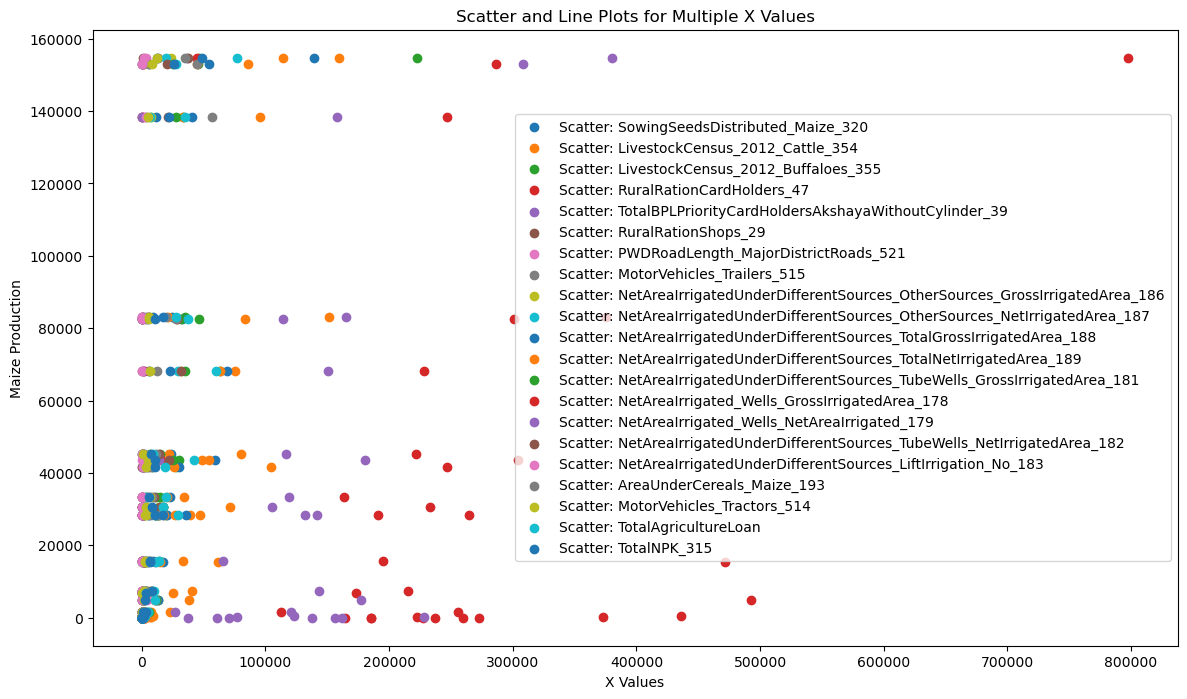

In [78]:
# Create a plot
plt.figure(figsize=(14, 8))

# Plot scatter and line for each x column
for x in X.columns:
    plt.scatter(df[x], y, label=f'Scatter: {x}')

# Adding title and labels
plt.title('Scatter and Line Plots for Multiple X Values')
plt.xlabel('X Values')
plt.ylabel('Maize Production')

# Adding legend
plt.legend()

# Show the plot
plt.show()

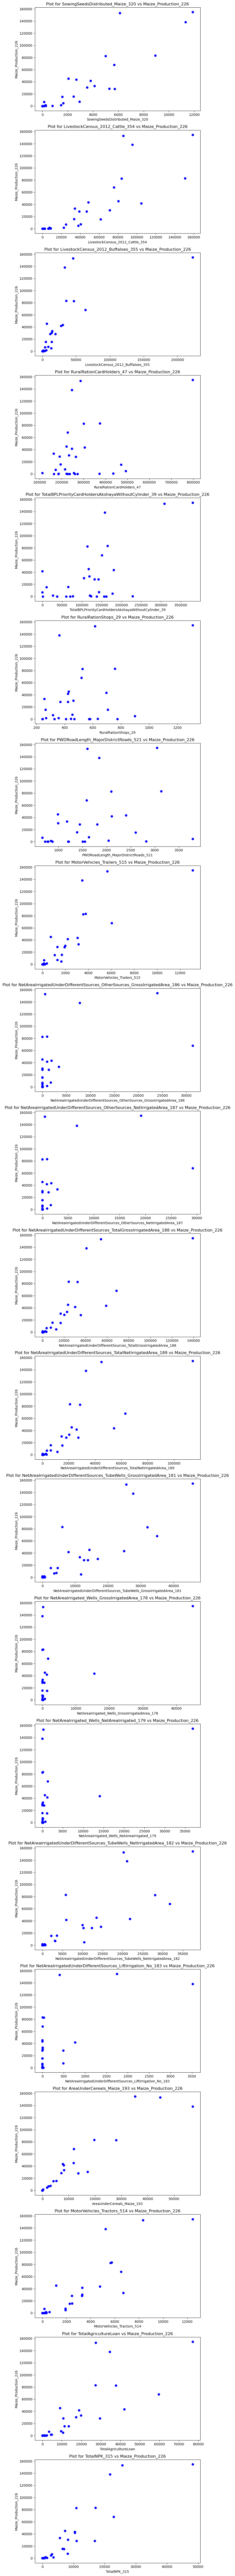

In [79]:
n = len(X.columns)

# Create subplots
fig, axs = plt.subplots(n, 1, figsize=(8, 5 * n))

# Plot each x column
for i, x in enumerate(X.columns):
    axs[i].scatter(df[x], y, label=f'Scatter: {x}', color='b')
    axs[i].set_title(f'Plot for {x} vs {y.name}')
    axs[i].set_xlabel(x)
    #axs[i].set_ylim([0, 100000])
    #axs[i].set_xlim([0, 10000])
    axs[i].set_ylabel(y.name)
    #axs[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [80]:
import statsmodels.api as sm
features = df.drop('Maize_Production_226', axis = 1)
actual_values = df['Maize_Production_226']
train_features = sm.add_constant(features)

In [81]:
save_df = pd.DataFrame()
linear_params = ['SowingSeedsDistributed_Maize_320','LivestockCensus_2012_Cattle_354','LivestockCensus_2012_Buffaloes_355','MotorVehicles_Trailers_515',
'NetAreaIrrigatedUnderDifferentSources_TotalGrossIrrigatedArea_188','NetAreaIrrigatedUnderDifferentSources_TotalNetIrrigatedArea_189',
'NetAreaIrrigatedUnderDifferentSources_TubeWells_GrossIrrigatedArea_181','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182',
'AreaUnderCereals_Maize_193','MotorVehicles_Tractors_514','TotalAgricultureLoan','TotalNPK_315','Maize_Production_226']
for column_name in df.columns:
    if( column_name in linear_params ):
        save_df[column_name] = df[column_name]
        



In [82]:
save_df.to_csv('12_parameters_linearity_maize.csv')

In [30]:
save_df = pd.read_csv('12_parameters_linearity_maize.csv')

In [48]:
corr = save_df.drop('Unnamed: 0', axis=1).drop('Maize_Production_226', axis=1).drop('LivestockCensus_2012_Buffaloes_355', axis=1).drop('MotorVehicles_Trailers_515', axis=1).drop('NetAreaIrrigatedUnderDifferentSources_TotalGrossIrrigatedArea_188', axis=1).drop('NetAreaIrrigatedUnderDifferentSources_TotalNetIrrigatedArea_189', axis=1).drop('NetAreaIrrigatedUnderDifferentSources_TubeWells_GrossIrrigatedArea_181', axis=1).drop('NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182', axis=1).drop('TotalAgricultureLoan', axis=1).drop('MotorVehicles_Tractors_514', axis=1).corr(method='pearson')
corr[ corr > 0.9 ] = 0
corr

,SowingSeedsDistributed_Maize_320,LivestockCensus_2012_Cattle_354,AreaUnderCereals_Maize_193,TotalNPK_315
SowingSeedsDistributed_Maize_320,0.000000,0.870745,0.858919,0.899620
LivestockCensus_2012_Cattle_354,0.870745,0.000000,0.735023,0.835534
AreaUnderCereals_Maize_193,0.858919,0.735023,0.000000,0.779651
TotalNPK_315,0.899620,0.835534,0.779651,0.000000


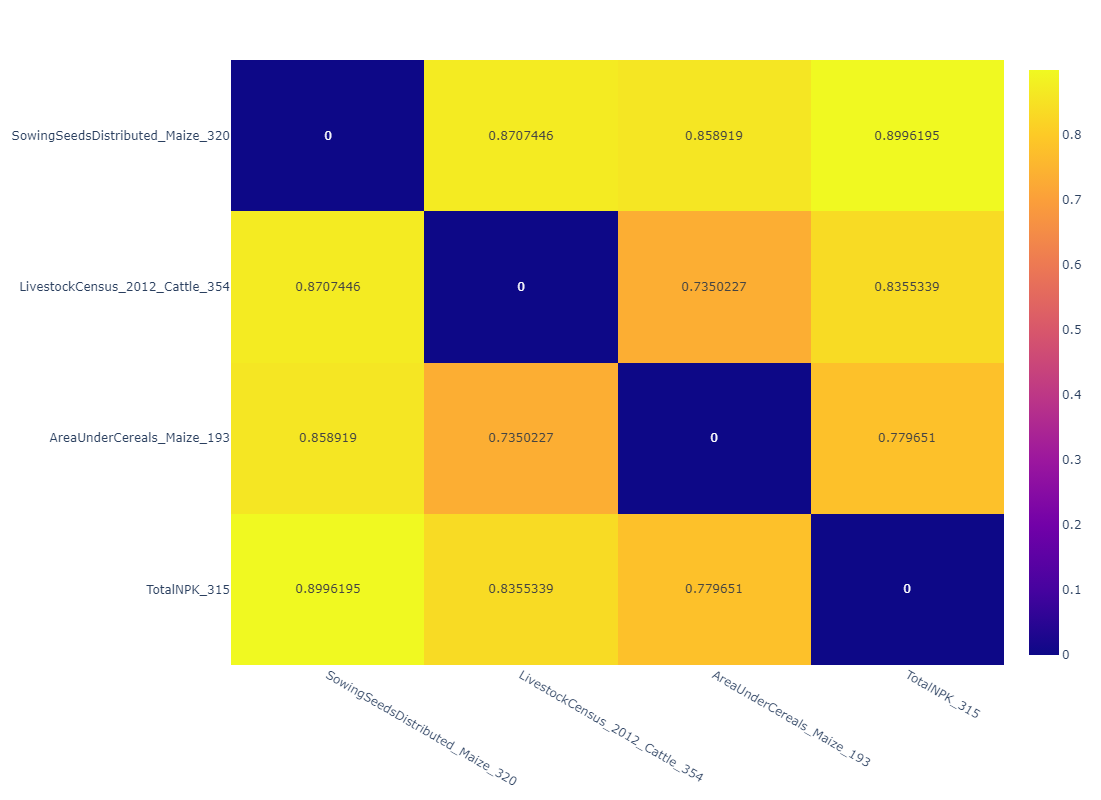

In [49]:
import plotly.express as px
fig = px.imshow(corr, text_auto=True, aspect="auto")
fig.layout.height = 800
fig.layout.width = 700
fig.show()

In [83]:
four_params = save_df.drop('Unnamed: 0', axis=1).drop('Maize_Production_226', axis=1).drop('LivestockCensus_2012_Buffaloes_355', axis=1).drop('MotorVehicles_Trailers_515', axis=1).drop('NetAreaIrrigatedUnderDifferentSources_TotalGrossIrrigatedArea_188', axis=1).drop('NetAreaIrrigatedUnderDifferentSources_TotalNetIrrigatedArea_189', axis=1).drop('NetAreaIrrigatedUnderDifferentSources_TubeWells_GrossIrrigatedArea_181', axis=1).drop('NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182', axis=1).drop('TotalAgricultureLoan', axis=1).drop('MotorVehicles_Tractors_514', axis=1)
four_params

KeyError: "['Unnamed: 0'] not found in axis"

In [52]:
four_params.to_csv('4_parameters_multicollinearity_maize.csv')

In [96]:
import numpy as np
import pandas as pd

# Assuming train_features is your DataFrame and actual_values is your Series
X = train_features.values
y = actual_values.values

# Compute the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)
coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

# Predicted values
predicted_values = np.dot(X, coefficients)

# Create a pandas Series for predicted values
predicted_values = pd.Series(predicted_values, index=train_features.index)
print(predicted_values)

0       1943.839106
1       7090.618905
2        927.269209
3      82594.311238
4     153195.882963
5      -1193.252627
6      31547.997490
7      41792.846821
8       5463.133325
9       7857.409598
10       533.304403
11       451.232815
12     83715.010329
13      1712.890035
14       206.006860
15     14740.456916
16     44344.805834
17    154749.297244
18     43505.887410
19     68032.880269
20     12169.319026
21     33312.358867
22    137994.330904
23      1577.391794
24     29400.193978
25      -800.189286
26       170.292797
27      1276.178428
28      -934.085326
29     27754.955508
dtype: float64


Variance of Residuals: 907190.2049217486


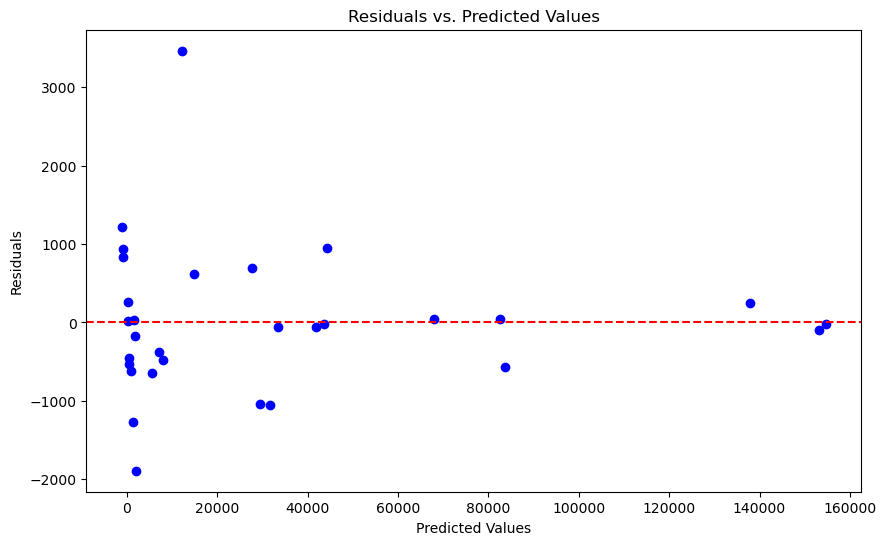

Breusch-Pagan Test
LM Statistic: 0.9887772328201883, p-value: 0.3200414132070105


In [97]:
df_values = df
df_values['residuals'] = actual_values - predicted_values 
df_values['predicted'] = predicted_values
# Compute the variance of residuals
variance_residuals = np.var(df_values['residuals'], ddof=1)  # ddof=1 for sample variance

print("Variance of Residuals:", variance_residuals)

# Plot Residuals vs. Predicted Values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, df_values['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Optional: Breusch-Pagan test for homoscedasticity
# Adding a constant to the model
X = sm.add_constant(df_values['predicted'])
results = sm.OLS(df_values['residuals'], X).fit()
test_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

print("Breusch-Pagan Test")
print(f"LM Statistic: {test_results[0]}, p-value: {test_results[1]}")


D:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


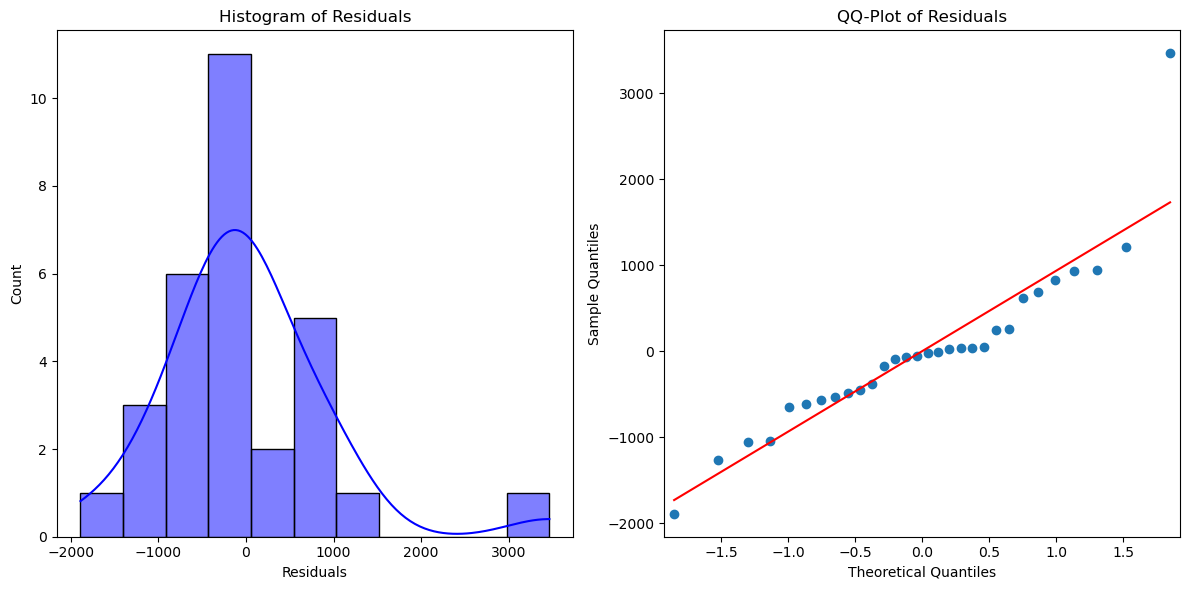

Shapiro-Wilk Test
Statistic: 0.8863334655761719, p-value: 0.003953824285417795
Skewness: 1.4532597544618315, Kurtosis: 5.263518676713117
Jarque-Bera Test
Statistic: 31.910930549505636, p-value: 1.1766017093154619e-07


In [98]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera

# 1. Histogram and QQ-Plot for residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_values['residuals'], kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# QQ-Plot
plt.subplot(1, 2, 2)
qqplot(df_values['residuals'], line='s', ax=plt.gca())
plt.title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

# 2. Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_values['residuals'])
print("Shapiro-Wilk Test")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 3. Skewness and Kurtosis
skewness = df_values['residuals'].skew()
kurtosis = df_values['residuals'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

# 4. Jarque-Bera Test
jb_test = jarque_bera(df_values['residuals'])
print("Jarque-Bera Test")
print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")


In [99]:
df_saved_values = pd.DataFrame()
df_saved_values['Sowing Seeds'] = df['SowingSeedsDistributed_Maize_320']
df_saved_values['Cattle'] = df['LivestockCensus_2012_Cattle_354']
df_saved_values['Buffaloes'] = df['LivestockCensus_2012_Buffaloes_355']
df_saved_values['Gross Irrigated Area'] = df['NetAreaIrrigatedUnderDifferentSources_TotalGrossIrrigatedArea_188'] 
df_saved_values['Net Irrigated Area'] = df['NetAreaIrrigatedUnderDifferentSources_TotalNetIrrigatedArea_189']
df_saved_values['Area (Maize)'] = df['AreaUnderCereals_Maize_193'] 
df_saved_values['Tractors Count'] = df['MotorVehicles_Tractors_514'] 
df_saved_values['Total Loan'] = df['TotalAgricultureLoan'] 
df_saved_values['Total NPK'] = df['TotalNPK_315']

In [100]:
df_saved_values.to_csv('9_parameters_dataset.csv')

In [101]:
df_saved_values['Irrigated Area'] = (df_saved_values['Gross Irrigated Area'] + df_saved_values['Net Irrigated Area']) / 2

In [102]:
df_saved_values = df_saved_values.drop('Gross Irrigated Area', axis=1).drop('Net Irrigated Area', axis=1)

In [103]:
corr = df_saved_values.corr(method='pearson')
corr[ corr > 0.9 ] = 0
corr

,Sowing Seeds,Cattle,Buffaloes,Area (Maize),Tractors Count,Total Loan,Total NPK,Irrigated Area
Sowing Seeds,0.000000,0.870745,0.728930,0.858919,0.867879,0.826731,0.899620,0.783290
Cattle,0.870745,0.000000,0.712551,0.735023,0.823179,0.782508,0.835534,0.763517
Buffaloes,0.728930,0.712551,0.000000,0.569378,0.836390,0.856287,0.899288,0.000000
Area (Maize),0.858919,0.735023,0.569378,0.000000,0.763514,0.673887,0.779651,0.651500
Tractors Count,0.867879,0.823179,0.836390,0.763514,0.000000,0.000000,0.000000,0.000000
Total Loan,0.826731,0.782508,0.856287,0.673887,0.000000,0.000000,0.000000,0.000000
Total NPK,0.899620,0.835534,0.899288,0.779651,0.000000,0.000000,0.000000,0.000000
Irrigated Area,0.783290,0.763517,0.000000,0.651500,0.000000,0.000000,0.000000,0.000000


In [104]:
from scipy.stats import boxcox
def boxcox_transform(data_series):
    # Ensure all data points are positive as Box-Cox transformation requires it
    if any(data_series <= 0):
        raise ValueError("Data series must be positive for Box-Cox transformation")
    
    transformed_data, best_lambda = boxcox(data_series)
    return transformed_data, best_lambda

In [105]:
def log_transform(df):
    # Replace non-positive values with zeros
    df = df.where(df > 0, 0)
    log_df = np.log(df + 1)
    return log_df

In [106]:
def reverse_log_transform(log_df):
    # Reverse the log transformation by applying the exponential function and then subtracting 1
    original_df = np.exp(log_df) - 1
    return original_df

In [107]:
def exp_transform(df):
    # Apply the exponential function to the DataFrame
    exp_df = np.exp(df)
    return exp_df

In [108]:
def reverse_exp_transform(exp_df):
    # Reverse the exponential transformation by applying the logarithm
    log_df = np.log(exp_df)
    return log_df

In [109]:
import statsmodels.api as sm
features = df_saved_values.drop('Irrigated Area', axis=1).drop('Buffaloes', axis=1).drop('Total Loan', axis=1).drop('Tractors Count', axis=1)
#df['Maize_Production_226'] = df['Maize_Production_226'] + 1
values = df['Maize_Production_226']
actual_values = values
train_features = sm.add_constant(features)

In [110]:
features

,Sowing Seeds,Cattle,Area (Maize),Total NPK
0,4.45,2567.461578,21.222885,438.180210
1,134.73,25037.139271,2343.704505,3036.080250
2,260.15,7729.614277,59.095502,222.225258
3,5004.00,83821.593093,28010.714286,10902.406571
4,6124.60,85657.632091,44727.948218,25702.835480
5,51.50,2278.829821,6.367781,220.782906
6,3538.15,71206.945309,17163.562374,8196.896749
7,3814.02,104722.000363,8073.605763,10428.246256
8,1639.85,37944.093756,1742.686751,2746.313635
9,2923.79,40572.445630,3104.565618,8156.290370


In [111]:
features.to_csv('4_paramter_dataset.csv')

In [112]:
import numpy as np
import pandas as pd

# Assuming train_features is your DataFrame and actual_values is your Series
X = train_features.values
y = actual_values

# Compute the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)
coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

# Predicted values
predicted_values = (np.dot(X, coefficients))

# Create a pandas Series for predicted values
predicted_values = pd.Series(predicted_values, index=train_features.index)
print(predicted_values)

0      -1593.372950
1      12184.394081
2      -1752.375492
3      79024.999254
4     140097.275405
5      -2233.448067
6      52330.930525
7      41771.752394
8       7918.222232
9      17275.225627
10     -2920.943516
11     -2898.767433
12     72005.828988
13      4872.343526
14      -883.477344
15     25741.671633
16     45320.785177
17    155979.464153
18     33991.456272
19     61976.009271
20     19156.875173
21     18825.983804
22    145162.362820
23      -804.006267
24     48669.098624
25     -2059.417236
26      -886.389336
27     -1994.944917
28     -2814.888403
29     23669.926835
dtype: float64


Variance of Residuals: 66440628.86714515


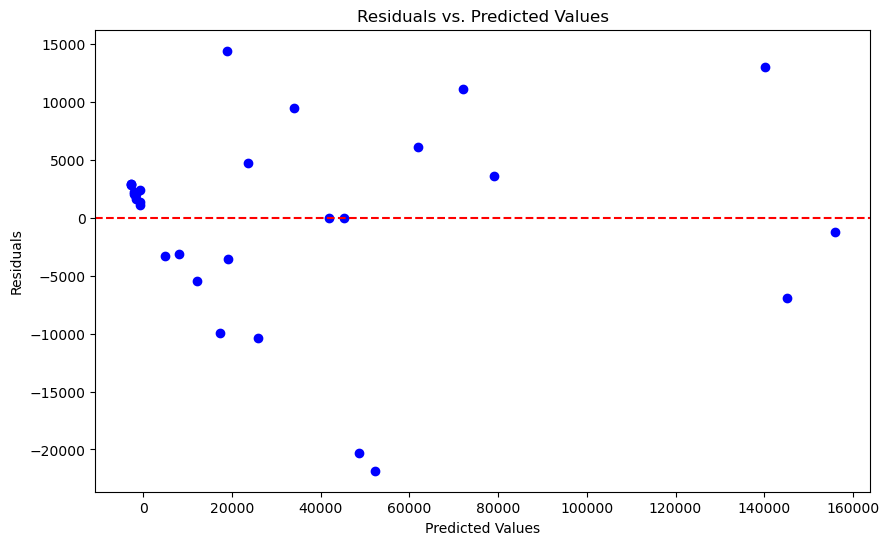

Breusch-Pagan Test
LM Statistic: 1.762011562589778, p-value: 0.18437380904182732


In [113]:
df_values = df
df_values['residuals'] = actual_values - predicted_values 
df_values['predicted'] = predicted_values
# Compute the variance of residuals
variance_residuals = np.var(df_values['residuals'], ddof=1)  # ddof=1 for sample variance

print("Variance of Residuals:", variance_residuals)

# Plot Residuals vs. Predicted Values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, df_values['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Optional: Breusch-Pagan test for homoscedasticity
# Adding a constant to the model
X = sm.add_constant(df_values['predicted'])
results = sm.OLS(df_values['residuals'], X).fit()
test_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

print("Breusch-Pagan Test")
print(f"LM Statistic: {test_results[0]}, p-value: {test_results[1]}")

D:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


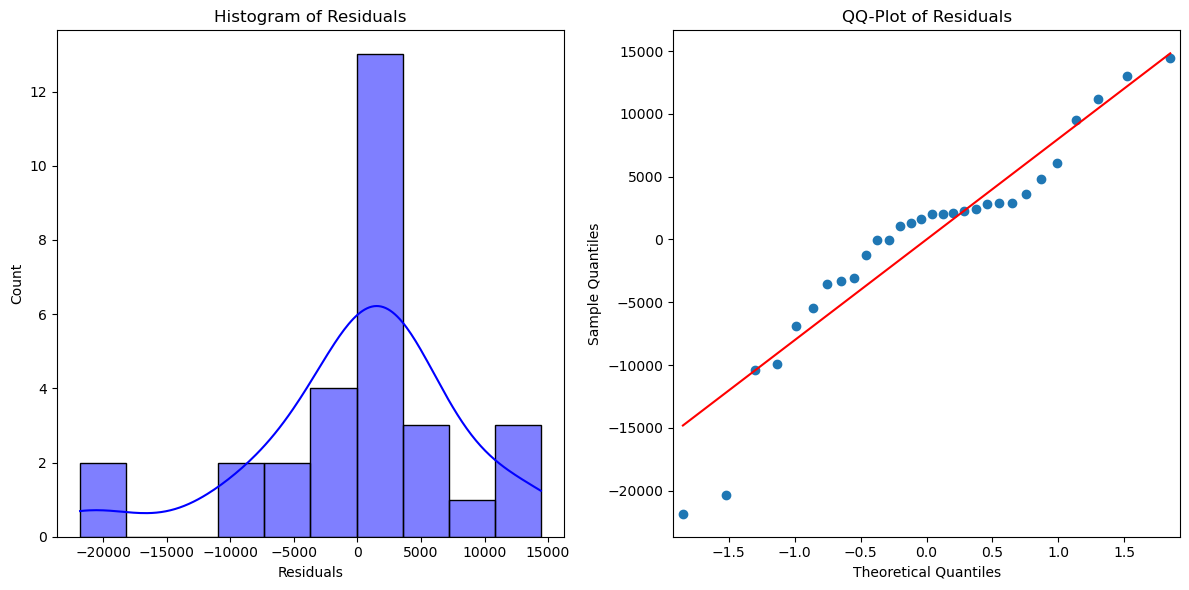

Shapiro-Wilk Test
Statistic: 0.9144186973571777, p-value: 0.019265269860625267
Skewness: -0.9228002544993882, Kurtosis: 1.6623730285525267
Jarque-Bera Test
Statistic: 5.650134291702974, p-value: 0.05930467463287086


In [114]:
# 1. Histogram and QQ-Plot for residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_values['residuals'], kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# QQ-Plot
plt.subplot(1, 2, 2)
qqplot(df_values['residuals'], line='s', ax=plt.gca())
plt.title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

# 2. Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_values['residuals'])
print("Shapiro-Wilk Test")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 3. Skewness and Kurtosis
skewness = df_values['residuals'].skew()
kurtosis = df_values['residuals'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

# 4. Jarque-Bera Test
jb_test = jarque_bera(df_values['residuals'])
print("Jarque-Bera Test")
print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")

In [115]:
model = sm.OLS(actual_values, train_features).fit()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['ViF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_df1 = calculate_vif(features)
                        #.drop('Irrigated by TubeWells', axis = 1).drop('Irrigated by Wells', axis=1).drop('Area (Maize)', axis=1).drop('Total Loan', axis=1))

print(vif_df1)

       Variable        ViF
0  Sowing Seeds  17.482668
1        Cattle   7.911972
2  Area (Maize)   5.554995
3     Total NPK   9.175839


usage: ipykernel_launcher.py [-h] csv_file
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

D:\Users\acer\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
